In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [19]:
file_url = r'C:\Users\Michel\git2\Ironhack-DAFT-Project7-ML-Netflix\imdb_processed_clean_encoded.csv'

In [20]:
df = pd.read_csv(file_url)

In [21]:
target='rating'

In [22]:
x=df.drop(columns=target)
#x=df_enc.drop(index=[712],columns='survived')
#x_check=titanic_enc.tail(1).drop(columns='survived')
y=round(df[target]).astype(int)

In [23]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6454, 18)
(6454,)
(1614, 18)
(1614,)


In [24]:
#standardization of data

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = pd.DataFrame(x_train) #x_train = pd.DataFrame(x_train , columns =['x'])
x_test = pd.DataFrame(x_test)

In [26]:
#transformation in dataframe ( standization build array)

x_train = pd.DataFrame(x_train) #x_train = pd.DataFrame(x_train , columns =['x'])
x_test = pd.DataFrame(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)


### Print accuracy

acc_lr = lr.score(x_test, y_test)
print('The accuracy of the Logistic Regression is:', acc_lr * 100, '%')



The accuracy of the Logistic Regression is: 35.74969021065675 %


C:\Users\Michel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# if the model overfit or underfit : we add penalty in parameter ( now it is none)

# to overfit or underfit 
acc_lr = lr.score(x_train, y_train)
acc_lr = lr.score(x_test, y_test)

# if both are low, it is underfit, if first is high, second is low, it is overfit
lr = LogisticRegression(penalty='l2', random_state = 0, solver='lbfgs', multi_class='auto')

In [29]:
#print confusion matrix +PRINT
from sklearn.metrics import confusion_matrix
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
conf_mat = confusion_matrix(y_test, y_pred) # we can add labels = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5']


print(conf_mat)

[[  0   0   0   0   5   3   2   0]
 [  0   0   0   0   9   6   9   0]
 [  0   0   2   0  41  28  15   0]
 [  0   1   1   0  52  59  21   1]
 [  0   0   1   0  86 236  59   0]
 [  0   0   1   0  72 306 124   1]
 [  0   0   0   0  50 190 182   2]
 [  0   0   0   0   1  12  35   1]]


C:\Users\Michel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Michel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        24
           4       0.40      0.02      0.04        86
           5       0.00      0.00      0.00       135
           6       0.27      0.23      0.25       382
           7       0.36      0.61      0.46       504
           8       0.41      0.43      0.42       424
           9       0.20      0.02      0.04        49

    accuracy                           0.36      1614
   macro avg       0.21      0.16      0.15      1614
weighted avg       0.31      0.36      0.31      1614



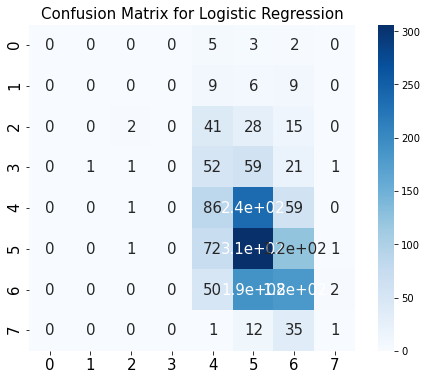

In [16]:
### Print  other results and matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Predict probabilities
probs_y=lr.predict_proba(x_test)

# function to generate results
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show() 


generate_results(lr, y_pred, 'Logistic Regression')


